In [43]:
using PyPlot,LinearAlgebra

In [44]:
function load_from_file(file,num_s)
	 s = fill((0.,0.,0.),num_s)
     open(file,"r") do fp
         @assert num_s == parse(Int64, readline(fp))
         for i in 1:num_s
             str = split(readline(fp))
             sx = parse(Float64, str[1])
             sy = parse(Float64, str[2])
             sz = parse(Float64, str[3])
             s[i] = (sx,sy,sz)
         end
     end
     return s 
end

load_from_file (generic function with 1 method)

In [45]:
kagome_file = "kagome.txt"
L = 6
num_s = 3*L^2
kagome = load_from_file(kagome_file,num_s)

108-element Array{Tuple{Float64,Float64,Float64},1}:
 (1.0, 1.0, 0.0)
 (3.0, 1.0, 0.0)
 (5.0, 1.0, 0.0)
 (7.0, 1.0, 0.0)
 (9.0, 1.0, 0.0)
 (11.0, 1.0, 0.0)
 (1.0, 2.0, 0.0)
 (2.0, 2.0, 0.0)
 (3.0, 2.0, 0.0)
 (4.0, 2.0, 0.0)
 (5.0, 2.0, 0.0)
 (6.0, 2.0, 0.0)
 (7.0, 2.0, 0.0)
 ⋮
 (1.0, 0.0, 0.0)
 (2.0, 0.0, 0.0)
 (3.0, 0.0, 0.0)
 (4.0, 0.0, 0.0)
 (5.0, 0.0, 0.0)
 (6.0, 0.0, 0.0)
 (7.0, 0.0, 0.0)
 (8.0, 0.0, 0.0)
 (9.0, 0.0, 0.0)
 (10.0, 0.0, 0.0)
 (11.0, 0.0, 0.0)
 (0.0, 0.0, 0.0)

In [46]:
site_pos = [kagome[i] ./ 2 for i in 1:num_s]

108-element Array{Tuple{Float64,Float64,Float64},1}:
 (0.5, 0.5, 0.0)
 (1.5, 0.5, 0.0)
 (2.5, 0.5, 0.0)
 (3.5, 0.5, 0.0)
 (4.5, 0.5, 0.0)
 (5.5, 0.5, 0.0)
 (0.5, 1.0, 0.0)
 (1.0, 1.0, 0.0)
 (1.5, 1.0, 0.0)
 (2.0, 1.0, 0.0)
 (2.5, 1.0, 0.0)
 (3.0, 1.0, 0.0)
 (3.5, 1.0, 0.0)
 ⋮
 (0.5, 0.0, 0.0)
 (1.0, 0.0, 0.0)
 (1.5, 0.0, 0.0)
 (2.0, 0.0, 0.0)
 (2.5, 0.0, 0.0)
 (3.0, 0.0, 0.0)
 (3.5, 0.0, 0.0)
 (4.0, 0.0, 0.0)
 (4.5, 0.0, 0.0)
 (5.0, 0.0, 0.0)
 (5.5, 0.0, 0.0)
 (0.0, 0.0, 0.0)

In [47]:
q0_file = "q0.txt"
q0  = load_from_file(q0_file,num_s)
sqrt3_file = "sqrt3.txt"
sqrt3 = load_from_file(sqrt3_file,num_s);

In [48]:
# a1 and a2 are lattice vectors.
function site_to_coord(kagome,a1,a2)
	num_sites = length(kagome)
	sites = kagome
	coord = fill((0.,0.,0.),num_sites)
	for isite in 1:num_sites
		coord[isite] = kagome[isite][1].* a1 .+ kagome[isite][2].* a2
	end
	return coord
end

site_to_coord (generic function with 1 method)

In [49]:
a1 = (1.0,0.0,0.0)
a2 = (-1/2,sqrt(3)/2,0.0)
kagome_coord = site_to_coord(site_pos,a1,a2)

108-element Array{Tuple{Float64,Float64,Float64},1}:
 (0.25, 0.4330127018922193, 0.0)
 (1.25, 0.4330127018922193, 0.0)
 (2.25, 0.4330127018922193, 0.0)
 (3.25, 0.4330127018922193, 0.0)
 (4.25, 0.4330127018922193, 0.0)
 (5.25, 0.4330127018922193, 0.0)
 (0.0, 0.8660254037844386, 0.0)
 (0.5, 0.8660254037844386, 0.0)
 (1.0, 0.8660254037844386, 0.0)
 (1.5, 0.8660254037844386, 0.0)
 (2.0, 0.8660254037844386, 0.0)
 (2.5, 0.8660254037844386, 0.0)
 (3.0, 0.8660254037844386, 0.0)
 ⋮
 (0.5, 0.0, 0.0)
 (1.0, 0.0, 0.0)
 (1.5, 0.0, 0.0)
 (2.0, 0.0, 0.0)
 (2.5, 0.0, 0.0)
 (3.0, 0.0, 0.0)
 (3.5, 0.0, 0.0)
 (4.0, 0.0, 0.0)
 (4.5, 0.0, 0.0)
 (5.0, 0.0, 0.0)
 (5.5, 0.0, 0.0)
 (0.0, 0.0, 0.0)

In [50]:
s1 = (0.25, 0.4330127018922193, 0.0) 
norm(s1)

0.49999999999999994

In [56]:
function plot_spin_config(kagome,spins)
    c = "red"
    lw = 0.5
    ls = :dash
    
    num_sites = length(kagome)
    @assert length(spins) == num_sites
    site_x = [kagome[i][1] for i in 1:num_sites]
    site_y = [kagome[i][2] for i in 1:num_sites]
    spin_x = [spins[i][1]  for i in 1:num_sites]
    spin_y = [spins[i][2]  for i in 1:num_sites]
  
	plt.figure()
	plt.axes().set_aspect("equal")
	#Plot spin config on a kagome lattice as a vector field.
    plt.quiver(site_x,site_y,spin_x,spin_y,pivot=:middle)
   
    for i in 1:length(site_x),j in 1:length(site_x)
        if i < j && abs(0.5-norm(kagome[i].-kagome[j])) < 1e-2
            plt.plot([site_x[i],site_x[j]],[site_y[i],site_y[j]],color=c)
        end
    end
	plt.show()
end

plot_spin_config (generic function with 1 method)

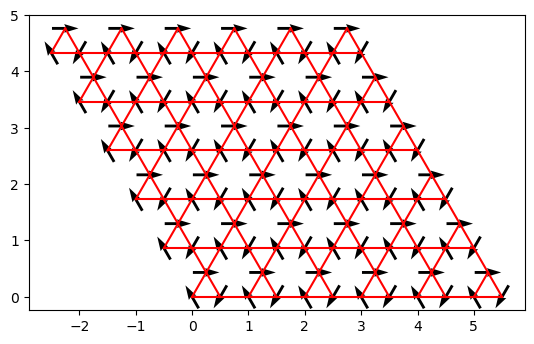

In [57]:
#test plot for q=0 structure 
plot_spin_config(kagome_coord,q0)

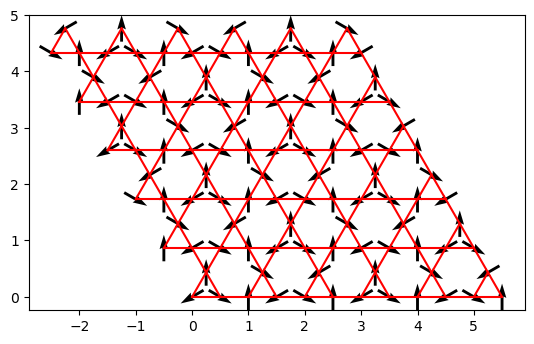

In [58]:
#test plot for √3×√3 structure 
plot_spin_config(kagome_coord,sqrt3)